# Testing the ALeRCE forecasting tool (under construction)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load the ALeRCE client 
https://alerce-new-python-client.readthedocs.io/en/main/tutorials/ztf_api.html#usage

In [2]:
my_config = {
    "ZTF_API_URL": "https://dev.api.alerce.online"
}
from alerce.core import Alerce
alerce = Alerce()
alerce.load_config_from_object(my_config)

# Select a SN

In [49]:
oid = "ZTF19abahvdh" #"ZTF21aaqftuq"

# Check in ALeRCE explorer

In [50]:
from IPython.core.display import display, HTML
display(HTML("<a href=\"https://dev.alerce.online/object/%s\">%s</a>" % (oid, oid)))

# Query object statistics

In [51]:
alerce.query_objects(oid=oid, format='pandas')

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,None,...,58705.165648,52.99338,232.864384,7.095238,0.000024,0.00003,None,None,None,corr_bulk_0.0.1


# Query object band dependent statistics

In [52]:
alerce.query_magstats(oid=oid, format='pandas')

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,False,11,0,18.913940,18.838703,19.8553,18.138979,None,19.845331,19.8553,58652.170,58692.190,bulk_version_0.0.1
1,2,False,False,14,0,19.044666,19.071957,20.1245,18.344133,None,19.691998,20.1245,58652.293,58705.164,bulk_version_0.0.1


# Get light curve

In [53]:
# Getting detections for an object
det = alerce.query_detections(oid, format="pandas")
display(det)

# Getting non detections for an object
non_det = alerce.query_non_detections(oid, format="pandas")
display(non_det)
non_det

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,58652.172269,898172265915015003,1,898172265915,19.591700,1,898,3.101610,19.855300,None,...,19.7412,0.6077,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
1,58652.292697,898292695915015003,2,898292695915,19.592000,1,898,2.392100,20.124500,None,...,19.0745,0.3604,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
2,58655.192130,901192125915015004,2,901192125915,20.360611,1,901,2.802778,19.360770,None,...,19.1880,0.1500,480120259.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
3,58655.231933,901231935915015006,1,901231935915,20.553211,1,901,2.999988,19.257492,None,...,19.2263,0.1062,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
4,58658.211331,904211335915015003,1,904211335915,20.703148,1,904,2.865873,18.606083,None,...,18.6431,0.0760,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
5,58658.234016,904234015915015003,2,904234015915,20.688593,1,904,2.783247,18.785713,None,...,18.8180,0.0968,480120259.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
6,58661.190521,907190525915015005,2,907190525915,20.373148,1,907,2.792018,18.520197,None,...,18.4108,0.0813,480120259.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
7,58661.211840,907211845915015003,1,907211845915,20.588657,1,907,2.910407,18.309350,None,...,18.2819,0.0605,480120159.0,False,False,False,None,bulk_1.0.0,None,923213225915015003
8,58665.190174,911190175915015006,1,911190175915,20.715176,1,911,2.871967,18.138979,None,...,18.1015,0.0478,480120159.0,False,False,False,None,bulk_1.0.0,None,923213225915015003
9,58668.174884,914174885915015008,2,914174885915,20.374830,1,914,2.686432,18.344133,None,...,18.4607,0.0953,480120259.0,False,False,False,None,bulk_1.0.0,None,923213225915015003


,mjd,fid,diffmaglim
0,58633.297870,2,20.5317
1,58636.211343,2,20.5167
2,58636.273090,1,20.9806
3,58639.252338,1,20.7302
4,58639.273032,2,20.5695
5,58642.271806,2,20.7062
6,58642.296597,1,20.9286
7,58645.231099,1,19.8114
8,58645.295069,2,20.0941
9,58649.206424,1,19.0635


,mjd,fid,diffmaglim
0,58633.297870,2,20.5317
1,58636.211343,2,20.5167
2,58636.273090,1,20.9806
3,58639.252338,1,20.7302
4,58639.273032,2,20.5695
5,58642.271806,2,20.7062
6,58642.296597,1,20.9286
7,58645.231099,1,19.8114
8,58645.295069,2,20.0941
9,58649.206424,1,19.0635


# Plot stamps

In [54]:
#alerce.get_stamps(oid, candid=None)#candid=det.loc[det.has_stamp].candid.min())
alerce.plot_stamp(oid, candid=det.loc[det.has_stamp].candid.min())

# Plot light curve

Text(0, 0.5, 'mag')

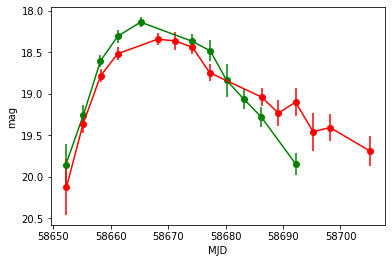

In [55]:
fig, ax = plt.subplots()
colors = {1: 'g', 2: 'r'}
for fid in det.fid.unique():
    mask = det.fid == fid
    ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD")
ax.set_ylabel("mag")

# Forecasting

In [56]:
times = np.linspace(det.mjd.min() - 10, det.mjd.max() + 30, 10)

In [57]:
import json
dict(response.json())["forecast"]

[{'magpsf': None, 'mjd': 59327.53490740014, 'fid': 1},
 {'magpsf': 17.13759343971208, 'mjd': 59327.53490740014, 'fid': 2}]

In [58]:
forecasts = []
for mjd in times:
    response = requests.get("http://3.238.105.175:8081/parametric/sn?oid=%s&mjd=%s" % (oid, mjd))
    forecasts += response.json()["forecast"]

Text(0, 0.5, 'mag')

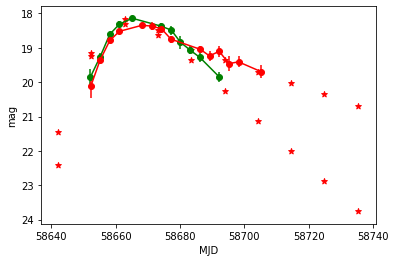

In [59]:
fig, ax = plt.subplots()
colors = {1: 'g', 2: 'r'}
for fid in det.fid.unique():
    mask = det.fid == fid
    ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o')    
for i in forecasts:
    if not i["magpsf"] is None:
        ax.scatter(i["mjd"], i["magpsf"], c=colors[fid], marker='*')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD")
ax.set_ylabel("mag")